In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
%matplotlib inline
plt.style.use("fivethirtyeight")

# Exploration

In [57]:
df = pd.read_csv("blackjack.csv")

In [58]:
df.shape

(50000, 22)

In [59]:
df.describe()

,num_decks,dealer_open,dealer_initial,dealer_hit,dealer_num_hits,dealer_3_card,dealer_final,dealer_busts,player_card_one,player_card_two,player_initial,player_hit,player_num_hits,player_3_card,player_final,player_busts,player_loses,draw,player_wins,strategy
count,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,4.0,6.533460,14.569060,0.409460,0.563600,17.105480,18.082460,0.177560,6.533540,6.55294,14.581880,0.568520,0.840620,18.164860,19.894100,0.296640,0.547140,0.072160,0.380700,0.500000
std,0.0,3.156606,4.086128,0.491739,0.779389,4.270161,4.375075,0.382146,3.157479,3.15485,4.090925,0.495288,0.900419,3.923084,3.889579,0.456781,0.497778,0.258755,0.485564,0.500005
min,4.0,1.000000,4.000000,0.000000,0.000000,4.000000,4.000000,0.000000,1.000000,1.00000,4.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.0,4.000000,12.000000,0.000000,0.000000,14.000000,16.000000,0.000000,4.000000,4.00000,12.000000,0.000000,0.000000,15.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.0,7.000000,15.000000,0.000000,0.000000,18.000000,19.000000,0.000000,7.000000,7.00000,15.000000,1.000000,1.000000,19.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,4.0,10.000000,18.000000,1.000000,1.000000,20.000000,21.000000,0.000000,10.000000,10.00000,18.000000,1.000000,1.000000,21.000000,22.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,4.0,10.000000,21.000000,1.000000,5.000000,26.000000,26.000000,1.000000,10.000000,10.00000,21.000000,1.000000,6.000000,28.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.groupby("strategy")[["player_wins"]].mean()

,player_wins
strategy,
0,0.3684
1,0.4029


# Hypothesis testing

$H_0$: There is no difference in results for the player between a random strategy and a recommended strategy.

$H_1$: There is a difference in results for the player between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

In [12]:
# Simulate trials of 100 games
def sim_trial():
    ran = gen_d.gen_df(gen_d.gen_data(num_decks=4, df_size=50, strategy=0))
    ran = ran[["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]].sum()/len(ran)
    ran = pd.DataFrame(ran, ["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]).T
    rec = gen_d.gen_df(gen_d.gen_data(num_decks=4, df_size=50, strategy=1))
    rec = rec[["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]].sum()/len(rec)
    rec = pd.DataFrame(rec, ["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]).T
    sub = pd.concat([ran, rec])
    return sub

In [13]:
def n_trials(n=5000):
    trials = sim_trial()
    for _ in range(n-1):
        trials = pd.concat([trials, sim_trial()])
        
    return trials

In [14]:
trials = pd.read_csv("trials.csv")

In [15]:
trials.shape

(60000, 6)

In [16]:
trials.describe()

,dealer_busts,player_busts,player_loses,draw,player_wins,strategy
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.177187,0.295778,0.545980,0.071467,0.382553,0.500000
std,0.071296,0.182143,0.074238,0.036871,0.071305,0.500004
min,0.000000,0.000000,0.240000,0.000000,0.100000,0.000000
25%,0.120000,0.120000,0.500000,0.040000,0.340000,0.000000
50%,0.180000,0.260000,0.540000,0.060000,0.380000,0.500000
75%,0.220000,0.460000,0.600000,0.100000,0.440000,1.000000
max,0.460000,0.820000,0.860000,0.280000,0.680000,1.000000


## Difference between losing, drawing and winning

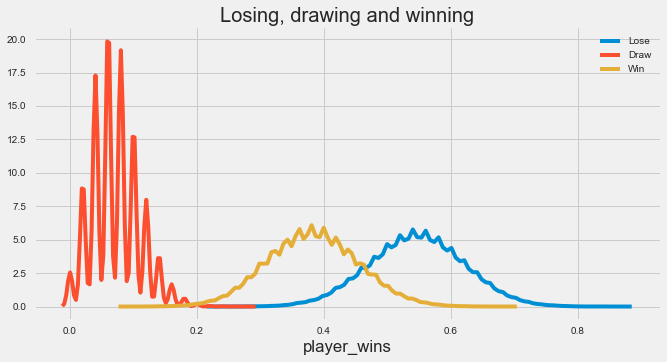

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_loses, hist=False, label="Lose");
sns.distplot(trials.draw, hist=False, label="Draw");
sns.distplot(trials.player_wins, hist=False, label="Win");
ax.set_title("Losing, drawing and winning");
sns.despine();

## Losses

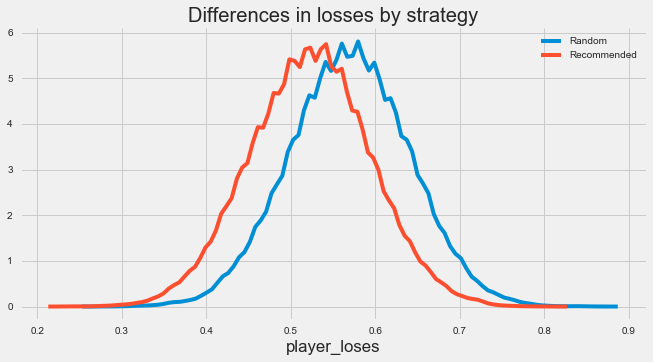

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_loses[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.player_loses[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in losses by strategy");
sns.despine();

## Draws

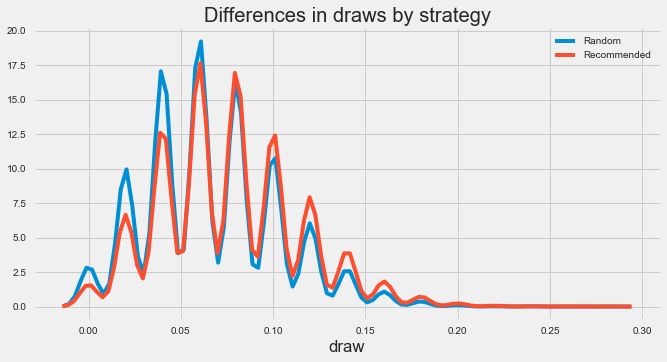

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.draw[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.draw[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in draws by strategy");
sns.despine();

## Wins

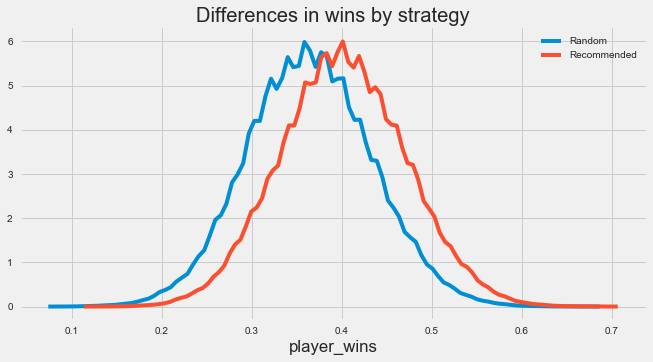

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_wins[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.player_wins[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in wins by strategy");
sns.despine();

## Player busting

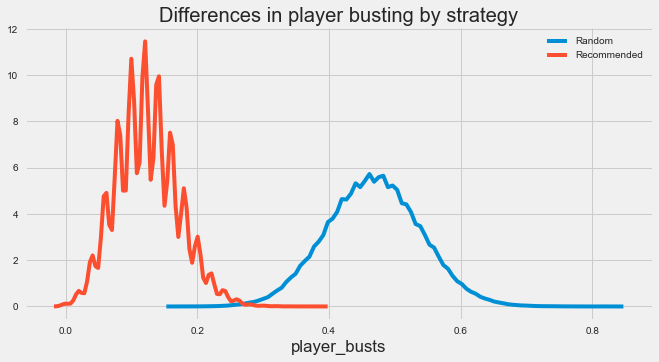

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_busts[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.player_busts[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in player busting by strategy");
sns.despine();

## Dealer busting

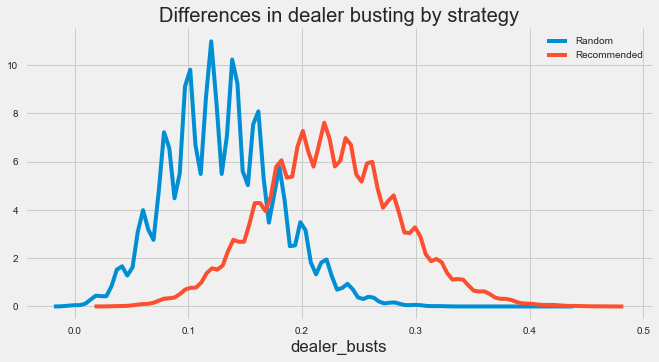

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.dealer_busts[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.dealer_busts[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in dealer busting by strategy");
sns.despine();

# Statistical testing

![t-test](https://camo.githubusercontent.com/3fe864d148f460fadd369d42645f60feebe77672/687474703a2f2f696d616765732e7475746f7276697374612e636f6d2f636d732f696d616765732f3131332f742d746573742d666f726d756c612e706e67)

## Is the difference in the 'rate' of losing between strategies statistically significant?

In [23]:
ran_lose = trials.player_loses[trials.strategy==0]
rec_lose = trials.player_loses[trials.strategy==1]
tt = (np.mean(ran_lose)-np.mean(rec_lose)) / np.sqrt((np.var(ran_lose)/len(ran_lose))+(np.var(rec_lose)/len(rec_lose)))
pval = stats.t.sf(abs(tt), len(rec_lose)-1)
print ("{:.2f}, {:.10f}".format(tt, pval))

80.89, 0.0000000000


## Is the difference in the 'rate' of winning between strategies statistically significant?

In [24]:
ran_win = trials.player_wins[trials.strategy==0]
rec_win = trials.player_wins[trials.strategy==1]
tt = (np.mean(ran_win)-np.mean(rec_win)) / np.sqrt((np.var(ran_win)/len(ran_win))+(np.var(rec_win)/len(rec_win)))
pval = stats.t.sf(abs(tt), len(rec_win)-1)
print ("{:.2f}, {:.10f}".format(tt, pval))

-66.57, 0.0000000000


## Is the difference in the 'rate' of busting between strategies statistically significant?

In [25]:
ran_busts = trials.player_busts[trials.strategy==0]
rec_busts = trials.player_busts[trials.strategy==1]
tt = (np.mean(ran_busts)-np.mean(rec_busts)) / np.sqrt((np.var(ran_busts)/len(ran_busts))+(np.var(rec_busts)/len(rec_busts)))
pval = stats.t.sf(abs(tt), len(rec_busts)-1)
print ("{:.2f}, {:.10f}".format(tt, pval))

700.48, 0.0000000000


In [26]:
ran_dbusts = trials.dealer_busts[trials.strategy==0]
rec_dbusts = trials.dealer_busts[trials.strategy==1]
tt = (np.mean(ran_dbusts)-np.mean(rec_dbusts)) / np.sqrt((np.var(ran_dbusts)/len(ran_dbusts))+(np.var(rec_dbusts)/len(rec_dbusts)))
pval = stats.t.sf(abs(tt), len(rec_dbusts)-1)
print ("{:.2f}, {:.10f}".format(tt, pval))

-216.47, 0.0000000000


# Looking at the dataset

In [27]:
df.head()

,num_decks,dealer_open,dealer_initial,dealer_hit,dealer_num_hits,dealer_3_card,dealer_final,dealer_busts,player_card_one,player_card_two,...,player_num_hits,player_3_card,player_final,player_busts,player_loses,draw,player_wins,strategy,dealer_hand,player_hand
0,4,8,14,0,0,14,14,0,10,3,...,1,23,23,1,1,0,0,0,"[8, 6]","['K', 3, 'K']"
1,4,1,14,0,0,14,14,0,10,3,...,1,23,23,1,1,0,0,0,"['A', 3]","['J', 3, 'Q']"
2,4,3,14,0,0,14,14,0,3,6,...,2,15,23,1,1,0,0,0,"[3, 'A']","[3, 6, 6, 8]"
3,4,10,20,0,0,20,20,0,3,1,...,4,16,24,1,1,0,0,0,"[10, 'K']","[3, 'A', 2, 7, 2, 9]"
4,4,2,13,0,0,13,13,0,8,6,...,1,24,24,1,1,0,0,0,"[2, 'A']","[8, 6, 10]"


In [40]:
score_cols = ["player_loses", "draw", "player_wins"]

## Analysis by one card

- To determine if we want to split
- Look at the probability of winning based on one card
    - Use first card for simplicity

In [41]:
one_card = df.groupby(["player_card_one", "strategy"])[score_cols].sum()
one_card.reset_index(inplace=True)
one_card["cases"] = one_card[score_cols].apply(sum, axis=1)
one_card.head()

,player_card_one,strategy,player_loses,draw,player_wins,cases
0,1,0,274,70,458,802
1,1,1,261,61,429,751
2,2,0,503,41,242,786
3,2,1,439,34,273,746
4,3,0,487,35,204,726


In [42]:
for i in score_cols:
    one_card["p_"+i] = one_card[i]/one_card["cases"]

In [30]:
one_card.head()

,player_card_one,strategy,player_loses,draw,player_wins,cases,p_player_loses,p_draw,p_player_wins
0,1,0,274,70,458,802,0.341646,0.087282,0.571072
1,1,1,261,61,429,751,0.347537,0.081225,0.571238
2,2,0,503,41,242,786,0.639949,0.052163,0.307888
3,2,1,439,34,273,746,0.588472,0.045576,0.365952
4,3,0,487,35,204,726,0.670799,0.048209,0.280992


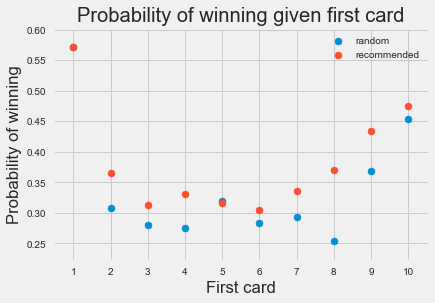

In [31]:
plt.scatter(one_card[one_card["strategy"]==0][["player_card_one"]], 
            one_card[one_card["strategy"]==0][["p_player_wins"]], label="random");
plt.scatter(one_card[one_card["strategy"]==1][["player_card_one"]], 
            one_card[one_card["strategy"]==1][["p_player_wins"]], label="recommended");
plt.legend();
plt.title("Probability of winning given first card");
plt.xlabel("First card");
plt.xticks(np.arange(1,11));
plt.ylabel("Probability of winning");

## Analysis by initial points

In [32]:
df.columns

Index(['num_decks', 'dealer_open', 'dealer_initial', 'dealer_hit',
       'dealer_num_hits', 'dealer_3_card', 'dealer_final', 'dealer_busts',
       'player_card_one', 'player_card_two', 'player_initial', 'player_hit',
       'player_num_hits', 'player_3_card', 'player_final', 'player_busts',
       'player_loses', 'draw', 'player_wins', 'strategy', 'dealer_hand',
       'player_hand'],
      dtype='object')

### By player

In [46]:
player_start = df.groupby(["player_initial", "strategy"])[score_cols].sum()
player_start.reset_index(inplace=True)
player_start["cases"] = player_start[score_cols].apply(sum, axis=1)
for i in score_cols:
    player_start["p_"+i] = player_start[i]/player_start["cases"]
player_start.head()

,player_initial,strategy,player_loses,draw,player_wins,cases,p_player_loses,p_draw,p_player_wins
0,4,0,39,4,14,57,0.684211,0.070175,0.245614
1,4,1,31,1,18,50,0.620000,0.020000,0.360000
2,5,0,82,5,32,119,0.689076,0.042017,0.268908
3,5,1,82,6,37,125,0.656000,0.048000,0.296000
4,6,0,110,8,56,174,0.632184,0.045977,0.321839


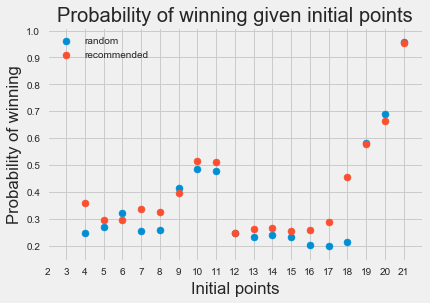

In [47]:
plt.scatter(player_start[player_start["strategy"]==0][["player_initial"]], 
            player_start[player_start["strategy"]==0][["p_player_wins"]], label="random");
plt.scatter(player_start[player_start["strategy"]==1][["player_initial"]], 
            player_start[player_start["strategy"]==1][["p_player_wins"]], label="recommended");
plt.legend();
plt.title("Probability of winning given initial points");
plt.xlabel("Initial points");
plt.xticks(np.arange(2,22));
plt.ylabel("Probability of winning");

### By dealer

In [48]:
dealer_start = df.groupby(["dealer_initial", "strategy"])[score_cols].sum()
dealer_start.reset_index(inplace=True)
dealer_start["cases"] = dealer_start[score_cols].apply(sum, axis=1)
for i in score_cols:
    dealer_start["p_"+i] = dealer_start[i]/dealer_start["cases"]
dealer_start.head()

,dealer_initial,strategy,player_loses,draw,player_wins,cases,p_player_loses,p_draw,p_player_wins
0,4,0,28,1,19,48,0.583333,0.020833,0.395833
1,4,1,30,5,22,57,0.526316,0.087719,0.385965
2,5,0,76,10,48,134,0.567164,0.074627,0.358209
3,5,1,58,13,49,120,0.483333,0.108333,0.408333
4,6,0,89,7,68,164,0.542683,0.042683,0.414634


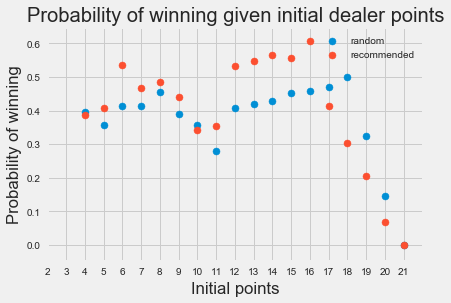

In [49]:
plt.scatter(dealer_start[dealer_start["strategy"]==0][["dealer_initial"]], 
            dealer_start[dealer_start["strategy"]==0][["p_player_wins"]], label="random");
plt.scatter(dealer_start[dealer_start["strategy"]==1][["dealer_initial"]], 
            dealer_start[dealer_start["strategy"]==1][["p_player_wins"]], label="recommended");
plt.legend();
plt.title("Probability of winning given initial dealer points");
plt.xlabel("Initial points");
plt.xticks(np.arange(2,22));
plt.ylabel("Probability of winning");

### By player and dealer

In [54]:
p_and_d = df.groupby(["dealer_initial", "player_initial", "strategy"])[score_cols].sum()
p_and_d.reset_index(inplace=True)
p_and_d["cases"] = p_and_d[score_cols].apply(sum, axis=1)
for i in score_cols:
    p_and_d["p_"+i] = p_and_d[i]/p_and_d["cases"]
p_and_d.head()

,dealer_initial,player_initial,strategy,player_loses,draw,player_wins,cases,p_player_loses,p_draw,p_player_wins
0,4,5,0,2,0,0,2,1.000000,0.00,0.000000
1,4,7,1,2,1,1,4,0.500000,0.25,0.250000
2,4,8,0,0,0,1,1,0.000000,0.00,1.000000
3,4,8,1,2,0,0,2,1.000000,0.00,0.000000
4,4,9,0,2,0,1,3,0.666667,0.00,0.333333


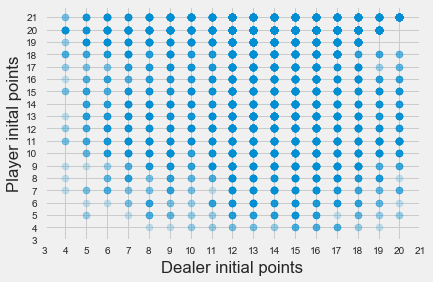

In [55]:
plt.scatter(x="dealer_initial", y="player_initial", data=df[df.player_wins==1], alpha=0.2);
plt.xlabel("Dealer initial points");
plt.ylabel("Player inital points");
plt.xticks(np.arange(3,22));
plt.yticks(np.arange(3,22));

# Given your first 2 cards and the dealer's open card (i.e. the open cards on the table), what's the probability that you end up with X points?

In [122]:
final_points = pd.pivot_table(df, index=["dealer_open", "player_card_one", "player_card_two"], 
                              columns="player_final", values="player_wins", aggfunc=len)
final_points.reset_index(inplace=True)

In [123]:
final_points.head()

player_final,dealer_open,player_card_one,player_card_two,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,5.0,4.0,2.0,NaN,1.0,NaN,1.0,NaN
1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,4.0,1.0,4.0,1.0,1.0,1.0,NaN,2.0
2,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,6.0,NaN,1.0,3.0,NaN,NaN,1.0,1.0
3,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN
4,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN


In [130]:
pd.melt(final_points, id_vars=["dealer_open", "player_card_one", "player_card_two"], value_vars=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])

,dealer_open,player_card_one,player_card_two,player_final,value
0,1,1,1,4,NaN
1,1,1,2,4,NaN
2,1,1,3,4,NaN
3,1,1,4,4,NaN
4,1,1,5,4,NaN
5,1,1,6,4,NaN
6,1,1,7,4,NaN
7,1,1,8,4,NaN
8,1,1,9,4,NaN
9,1,1,10,4,NaN


In [117]:
final_points["open_cards"] = 0

In [118]:
for i in final_points.index:
    final_points["open_cards"][i] = int("".join(str(i) for i in sorted([final_points.dealer_open[i], 
                                                                        final_points.player_card_one[i], 
                                                                        final_points.player_card_two[i]])))

/Users/joce/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [119]:
final_points.head()

player_final,dealer_open,player_card_one,player_card_two,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,open_cards
0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,4.0,2.0,NaN,1.0,NaN,1.0,NaN,111
1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,1.0,4.0,1.0,1.0,1.0,NaN,2.0,112
2,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,6.0,NaN,1.0,3.0,NaN,NaN,1.0,1.0,113
3,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,114
4,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN,115


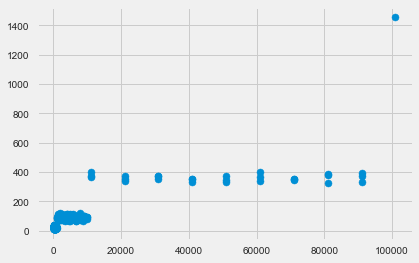

In [81]:
plt.scatter(final_points.open_cards, final_points.player_final);